#### This notebook consists of four tasks, which will be developed gradually :
1. Permutations and Combinations
2. numpy's Normal Distribution 
3. t-Test Calculation
4. ANOVA


### 1. Permutations and Combinations

This task is based on Lady Tasting Tea experiment created by Ronald Fisher published in The Design of Experiments in 1935.<br>Background: Eight cups of tea were given to a lady who was asked to differentiate between four cups of tea that had milk in first and four cups with tea added first. 

The null hypothesis H<sub>0</sub> of the experiment: The lady couldn't tell the difference between the cups.    

Task:       
- Altering the experiment by using 12 cups of tea instead of 8 with 6 having milk in first and 6 having tea in first where the subject claims to be able to tell the difference between the cups.<br> 
The H<sub>0</sub> remains the same: the subject is not able to distinguish between the cups.      
- Accept one error in the experiment assuming the subject selected 5 correct cups and calculate the probability with H<sub>0</sub> remaining the same     
- Accept two errors and calculate the probability         

In [1]:
# Importing modules
# Mathematical functions from the standard library.
# https://docs.python.org/3/library/math.html
import math

# Permutations and combinations.
# https://docs.python.org/3/library/itertools.html
import itertools

# Random selections.
# https://docs.python.org/3/library/random.html
import random

# Numerical structures and operations.
# https://numpy.org/doc/stable/reference/index.html#reference
import numpy as np

# Plotting.
# https://matplotlib.org/stable/contents.html
import matplotlib.pyplot as plt

In [2]:
# Number of cups of tea in total.
no_cups = 12

# Number of cups of tea with milk in first.
no_cups_milk_first = 6

# Number of cups of tea with tea in first.
no_cups_tea_first = 6

In [3]:
# https://docs.python.org/3/library/math.html#math.comb
# Combination represents the number of ways (k) to pick the cups with milk in first without repetition and order from the total number of cups (n)
ways = math.comb(no_cups, no_cups_milk_first)

# Show - there are 924 ways to pick the six cups with the milk in first
ways

924

In [4]:
# Total number of ways of selecting six cups from twelve, keeping them in order.
ways_ordered = 12 * 11 * 10 * 9 * 8 * 7

# Show.
ways_ordered

665280

In [5]:
# No of ways of shuffling the six cups.
no_shuffles = 6 * 5 * 4 * 3 * 2 * 1

# Show.
no_shuffles

720

In [6]:
# No of combinations.
no_combs = ways_ordered // no_shuffles

# Show.
no_combs

924

In [7]:
# The cup labels
labels = list(range(no_cups))

# Show.
labels

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [8]:
# Showing all the ways of selecting no_cups_milk_first out of no_cups cups of tea by using 
combs = list(itertools.combinations(labels, no_cups_milk_first))

# Show.
combs

[(0, 1, 2, 3, 4, 5),
 (0, 1, 2, 3, 4, 6),
 (0, 1, 2, 3, 4, 7),
 (0, 1, 2, 3, 4, 8),
 (0, 1, 2, 3, 4, 9),
 (0, 1, 2, 3, 4, 10),
 (0, 1, 2, 3, 4, 11),
 (0, 1, 2, 3, 5, 6),
 (0, 1, 2, 3, 5, 7),
 (0, 1, 2, 3, 5, 8),
 (0, 1, 2, 3, 5, 9),
 (0, 1, 2, 3, 5, 10),
 (0, 1, 2, 3, 5, 11),
 (0, 1, 2, 3, 6, 7),
 (0, 1, 2, 3, 6, 8),
 (0, 1, 2, 3, 6, 9),
 (0, 1, 2, 3, 6, 10),
 (0, 1, 2, 3, 6, 11),
 (0, 1, 2, 3, 7, 8),
 (0, 1, 2, 3, 7, 9),
 (0, 1, 2, 3, 7, 10),
 (0, 1, 2, 3, 7, 11),
 (0, 1, 2, 3, 8, 9),
 (0, 1, 2, 3, 8, 10),
 (0, 1, 2, 3, 8, 11),
 (0, 1, 2, 3, 9, 10),
 (0, 1, 2, 3, 9, 11),
 (0, 1, 2, 3, 10, 11),
 (0, 1, 2, 4, 5, 6),
 (0, 1, 2, 4, 5, 7),
 (0, 1, 2, 4, 5, 8),
 (0, 1, 2, 4, 5, 9),
 (0, 1, 2, 4, 5, 10),
 (0, 1, 2, 4, 5, 11),
 (0, 1, 2, 4, 6, 7),
 (0, 1, 2, 4, 6, 8),
 (0, 1, 2, 4, 6, 9),
 (0, 1, 2, 4, 6, 10),
 (0, 1, 2, 4, 6, 11),
 (0, 1, 2, 4, 7, 8),
 (0, 1, 2, 4, 7, 9),
 (0, 1, 2, 4, 7, 10),
 (0, 1, 2, 4, 7, 11),
 (0, 1, 2, 4, 8, 9),
 (0, 1, 2, 4, 8, 10),
 (0, 1, 2, 4, 8, 11),
 (0, 1, 2, 4

In [9]:
# Number of combinations.
len(combs)

924

In [10]:
# Select six cups at random to put milk in first
# https://docs.python.org/3/library/random.html#random.sample
# Different, randomized output each time 
labels_milk = random.sample(labels, 6)

# Sort, inplace.
labels_milk.sort()

# Show.
labels_milk

[2, 4, 8, 9, 10, 11]

In [11]:
# Turn labels_milk into a set - gives unique values 
# Uses: https://docs.python.org/3/tutorial/datastructures.html#sets
set(labels_milk)

{2, 4, 8, 9, 10, 11}

In [12]:
# Calculate the overlap between each element of combs and labels_milk.

no_overlaps = []

for comb in combs:
  # Turn comb into a set.
  s1 = set(comb)
  # Turn labels_milk into a set.
  s2 = set(labels_milk)
  # Figure out where they overlap.
  overlap = s1.intersection(s2)
  # Show the combination and the overlap.
  print(comb, overlap, len(overlap))
  # Append overlap to no_overlaps.
  no_overlaps.append(len(overlap))

(0, 1, 2, 3, 4, 5) {2, 4} 2
(0, 1, 2, 3, 4, 6) {2, 4} 2
(0, 1, 2, 3, 4, 7) {2, 4} 2
(0, 1, 2, 3, 4, 8) {8, 2, 4} 3
(0, 1, 2, 3, 4, 9) {9, 2, 4} 3
(0, 1, 2, 3, 4, 10) {2, 10, 4} 3
(0, 1, 2, 3, 4, 11) {2, 11, 4} 3
(0, 1, 2, 3, 5, 6) {2} 1
(0, 1, 2, 3, 5, 7) {2} 1
(0, 1, 2, 3, 5, 8) {8, 2} 2
(0, 1, 2, 3, 5, 9) {9, 2} 2
(0, 1, 2, 3, 5, 10) {2, 10} 2
(0, 1, 2, 3, 5, 11) {2, 11} 2
(0, 1, 2, 3, 6, 7) {2} 1
(0, 1, 2, 3, 6, 8) {8, 2} 2
(0, 1, 2, 3, 6, 9) {9, 2} 2
(0, 1, 2, 3, 6, 10) {2, 10} 2
(0, 1, 2, 3, 6, 11) {2, 11} 2
(0, 1, 2, 3, 7, 8) {8, 2} 2
(0, 1, 2, 3, 7, 9) {9, 2} 2
(0, 1, 2, 3, 7, 10) {2, 10} 2
(0, 1, 2, 3, 7, 11) {2, 11} 2
(0, 1, 2, 3, 8, 9) {8, 9, 2} 3
(0, 1, 2, 3, 8, 10) {8, 2, 10} 3
(0, 1, 2, 3, 8, 11) {8, 2, 11} 3
(0, 1, 2, 3, 9, 10) {9, 2, 10} 3
(0, 1, 2, 3, 9, 11) {9, 2, 11} 3
(0, 1, 2, 3, 10, 11) {11, 2, 10} 3
(0, 1, 2, 4, 5, 6) {2, 4} 2
(0, 1, 2, 4, 5, 7) {2, 4} 2
(0, 1, 2, 4, 5, 8) {8, 2, 4} 3
(0, 1, 2, 4, 5, 9) {9, 2, 4} 3
(0, 1, 2, 4, 5, 10) {2, 10, 4} 3
(0, 1, 2, 4, 5, 

In [13]:
# Show the overlaps.
print(no_overlaps)

[2, 2, 2, 3, 3, 3, 3, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 4, 2, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 2, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 

In [14]:
# Count the number of times each overlap occurs.
counts = np.unique(no_overlaps, return_counts=True)

# Show.
counts

(array([0, 1, 2, 3, 4, 5, 6]),
 array([  1,  36, 225, 400, 225,  36,   1], dtype=int64))

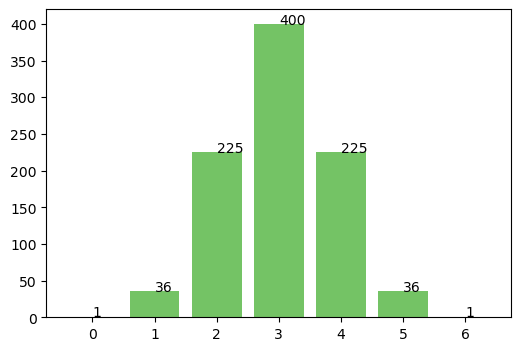

In [15]:
def addlabels(x,y):
    for i in range(len(x)):
        ax.text(i,y[i],y[i])

# Create a figure.
fig, ax = plt.subplots(figsize=(6, 4))

# Bar chart.
ax.bar(counts[0], counts[1], color='#74C365');
addlabels(counts[0], counts[1])

In [16]:
# The probability that she (randomly) selects at most five correct cups and 1 wrong
37/924

0.04004329004329004

In [17]:
# The probability that she (randomly) selects at most four correct cups (at most 2 wrong).
(225+36+1)/924

0.28354978354978355

The probability of the lady picking at most five correct and one wrong cup is very small, 4% and there is a high chance she will make another mistake if she chooses the cups again. The probability of the lady picking at most two wrong and four correct cups is higher, 28% which is why we would accept two errors. 

#### Sources: 
<https://github.com/ianmcloughlin/2425_applied_statistics>


### 2. numpy's Normal Distribution 


The purpose of this task is to check if numpy.random.normal() is generating normal values for 100 000 values where μ=10.0 and σ=3.0. To check if the sample came from the normal distribution scipy.stats.shapiro() test was used, while the histogram and the normal distribution probability density function were plotted for data visualisation. 

In [18]:
# Libraries necessary for generating and testing normal distribution
import numpy as np

# Plotting
import matplotlib.pyplot as plt

# Needed for Shapiro-Wilk test
import scipy.stats as stats

# Statistics module
import statsmodels as sm

Documentation on generating a random sample from a normal distribution
https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html#numpy-random-normal

In [20]:
# Generating a sample of 100 000 values with μ=10.0 and σ=3.0 
sample = np.random.normal(loc=10.0, scale=3.0, size=100000)

# Show sample
sample

array([11.03206755, 11.8263952 , 10.27936226, ...,  9.28051078,
       11.22827179, 10.7664782 ])

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html#matplotlib-pyplot-hist
https://matplotlib.org/stable/api/figure_api.html


(array([1.00006000e-04, 3.25019501e-04, 5.75034502e-04, 1.21257275e-03,
        2.83767026e-03, 5.88785327e-03, 1.00381023e-02, 1.80385823e-02,
        2.96142769e-02, 4.57277437e-02, 6.32662960e-02, 8.57301438e-02,
        1.07043923e-01, 1.20944757e-01, 1.31070364e-01, 1.30257815e-01,
        1.24244955e-01, 1.04843791e-01, 8.71552293e-02, 6.57539452e-02,
        4.56277377e-02, 3.04518271e-02, 1.78635718e-02, 1.04756285e-02,
        5.68784127e-03, 3.05018301e-03, 1.43758626e-03, 5.37532252e-04,
        1.50009001e-04, 5.00030002e-05]),
 array([-2. , -1.2, -0.4,  0.4,  1.2,  2. ,  2.8,  3.6,  4.4,  5.2,  6. ,
         6.8,  7.6,  8.4,  9.2, 10. , 10.8, 11.6, 12.4, 13.2, 14. , 14.8,
        15.6, 16.4, 17.2, 18. , 18.8, 19.6, 20.4, 21.2, 22. ]),
 <BarContainer object of 30 artists>)

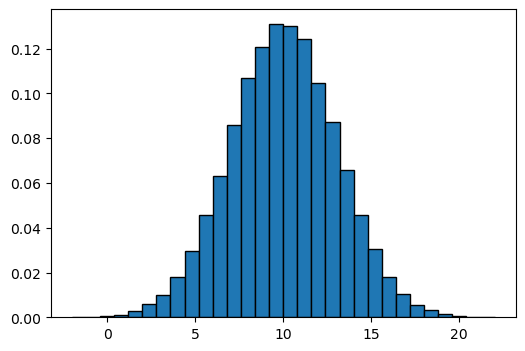

In [72]:
# Histogram of our sample data
fig, ax = plt.subplots(figsize=(6, 4))

ax.hist(sample, edgecolor='black', density="True", bins=np.linspace(-2, 22, 31))